In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp

### Now we train another neural network for z and $D_L(z)$

In [2]:
file = '../data/jla_binned_distances_31nodes_v1.txt'

# filefull = '/home/cosmocicatais/Documents/github/neuralCosmoReconstruction/data/jla_lcparams.txt'
syscov = np.loadtxt('../data/cov_jla_binned_distances_31nodes_v1.txt',skiprows=1).reshape((31,31))
# syscov = np.loadtxt('../data/jla_v0_covmatrix.dat',skiprows=1).reshape((740,740))
# data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
# data = np.loadtxt(file, usecols=[1,4], skiprows=1)
data = np.loadtxt(file, skiprows=3)
nsize = len(syscov)
# print(data.head(31))
# data.head(31) 
# plt.savefig("DistbinnedJLA.png")
np.shape(syscov)

errors = np.diag(syscov).reshape(nsize,1)
errors = np.where(errors!= 0, np.log(errors), 0)
np.shape(errors)
len(data), len(errors)

(31, 31)

In [3]:
# shuffle = [x for x in range(len(data)) if x%2 == 0]
# comp = [x for x in range(len(data)) if x%2 ==1]
# shuffle.extend(comp)

shuffle = [0,1,2,3,4,5,6,7,8,30,28,26,24,22,20,9,10,12,14,16,18,29,27,25,23,21,19,17,15,13,11]
data = data[shuffle]

errors= errors[shuffle]
len(data), len(errors), len(shuffle)

(31, 31, 31)

In [4]:
dl = data[:,1]
z = data[:,0]
np.shape(z), np.shape(dl), np.shape(errors), len(data)

((31,), (31,), (31, 1), 31)

In [5]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]

zz = np.log(z)
# scalerz = StandardScaler()
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))

# scalerdl = StandardScaler()
# scalerdl.fit(dl.reshape(-1, 1))
# dll = scalerdl.transform(dl.reshape((-1,1)))
dll = dl.reshape(nsize, 1)
# scalererr = StandardScaler()
# scalererr.fit(errors.reshape(-1, 1))
# errscl = scalererr.transform(errors.reshape((-1,1)))

z_train, z_test = np.split(zz, indx)
y = np.concatenate((dll, errors), axis=1)
y_train, y_test = np.split(y, indx)
y

array([[32.95388698, -3.84986434],
       [33.87900347, -3.57001176],
       [33.84214074, -5.08934053],
       [34.11856704, -5.25237116],
       [34.59344598, -4.91939864],
       [34.93902653, -5.76034487],
       [35.25209633, -5.59152573],
       [35.74850165, -5.73770796],
       [36.06978761, -5.73659415],
       [44.82186746, -3.95445991],
       [43.97257341, -5.41127798],
       [43.05273149, -5.53630612],
       [42.23146107, -6.46943751],
       [41.42141744, -6.7879013 ],
       [40.56495606, -6.90163   ],
       [36.43457047, -5.17672268],
       [36.65111059, -4.75243442],
       [37.43017325, -5.43986085],
       [38.25325404, -5.6290339 ],
       [39.06785071, -6.50827487],
       [39.79214362, -6.875292  ],
       [44.51408758, -3.73378125],
       [43.50415083, -5.81575656],
       [42.61704707, -6.65151475],
       [41.79092346, -6.36312856],
       [40.90528778, -6.4749882 ],
       [40.1565346 , -6.82482173],
       [39.3414019 , -6.72268898],
       [38.61286934,

In [6]:
def model(input_z):
    efirst = Dense(100, activation='relu', input_shape=(1,))(input_z)
    x = Dense(50, activation='relu')(efirst)
    x = Dense(200, activation='relu')(x)
#     x = Dense(50, activation='relu')(x)
#     x = Dense(50, activation='relu')(x)
#     x = Dense(50, activation='relu')(x)
#     x = Dense(100, activation='relu')(x)
#     x = Dense(0, activation='relu')(x)
#     x = Dense(10, activation='relu')(x)
    elast = Dense(2,activation='linear')(x)
    return elast

batch_size = 4
epochs = 300
# epochs = 500
input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 402       
Total params: 15,852
Trainable params: 15,852
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_train = neural_model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/300
6/6 [==============================] - 0s 46ms/step - loss: 792.9923 - val_loss: 787.8066
Epoch 2/300
6/6 [==============================] - 0s 4ms/step - loss: 756.2344 - val_loss: 772.2462
Epoch 3/300
6/6 [==============================] - 0s 4ms/step - loss: 721.7599 - val_loss: 749.2616
Epoch 4/300
6/6 [==============================] - 0s 4ms/step - loss: 706.6573 - val_loss: 715.2548
Epoch 5/300
6/6 [==============================] - 0s 4ms/step - loss: 681.5538 - val_loss: 664.3134
Epoch 6/300
6/6 [==============================] - 0s 4ms/step - loss: 612.4390 - val_loss: 591.3438
Epoch 7/300
6/6 [==============================] - 0s 4ms/step - loss: 563.2720 - val_loss: 495.7755
Epoch 8/300
6/6 [==============================] - 0s 4ms/step - loss: 469.5986 - val_loss: 379.9299
Epoch 9/300
6/6 [==============================] - 0s 4ms/step - loss: 357.4527 - val_loss: 256.2065
Epoch 10/300
6/6 [==============================] - 0s 4ms/step - loss: 222.3066 - val_los

Epoch 84/300
6/6 [==============================] - 0s 4ms/step - loss: 0.3998 - val_loss: 0.2876
Epoch 85/300
6/6 [==============================] - 0s 4ms/step - loss: 0.4410 - val_loss: 0.3134
Epoch 86/300
6/6 [==============================] - 0s 4ms/step - loss: 0.3378 - val_loss: 0.2126
Epoch 87/300
6/6 [==============================] - 0s 4ms/step - loss: 0.3428 - val_loss: 0.2409
Epoch 88/300
6/6 [==============================] - 0s 4ms/step - loss: 0.4858 - val_loss: 0.3341
Epoch 89/300
6/6 [==============================] - 0s 4ms/step - loss: 0.2775 - val_loss: 0.2489
Epoch 90/300
6/6 [==============================] - 0s 4ms/step - loss: 0.3515 - val_loss: 0.1785
Epoch 91/300
6/6 [==============================] - 0s 4ms/step - loss: 0.3455 - val_loss: 0.1903
Epoch 92/300
6/6 [==============================] - 0s 4ms/step - loss: 0.3106 - val_loss: 0.3163
Epoch 93/300
6/6 [==============================] - 0s 4ms/step - loss: 0.3828 - val_loss: 0.2803
Epoch 94/300
6/6 [==

Epoch 167/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1341 - val_loss: 0.0435
Epoch 168/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1026 - val_loss: 0.0520
Epoch 169/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1423 - val_loss: 0.0622
Epoch 170/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1447 - val_loss: 0.0460
Epoch 171/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1059 - val_loss: 0.0460
Epoch 172/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1482 - val_loss: 0.0526
Epoch 173/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1427 - val_loss: 0.0461
Epoch 174/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1031 - val_loss: 0.0454
Epoch 175/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1511 - val_loss: 0.0557
Epoch 176/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1260 - val_loss: 0.0425
Epoch 177/

6/6 [==============================] - 0s 4ms/step - loss: 0.1490 - val_loss: 0.0523
Epoch 250/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1193 - val_loss: 0.0544
Epoch 251/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1355 - val_loss: 0.0627
Epoch 252/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1289 - val_loss: 0.0512
Epoch 253/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1449 - val_loss: 0.0523
Epoch 254/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1889 - val_loss: 0.0605
Epoch 255/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1810 - val_loss: 0.0523
Epoch 256/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1338 - val_loss: 0.0671
Epoch 257/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1275 - val_loss: 0.0491
Epoch 258/300
6/6 [==============================] - 0s 4ms/step - loss: 0.1152 - val_loss: 0.0634
Epoch 259/300
6/6 [=====

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.,  900.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

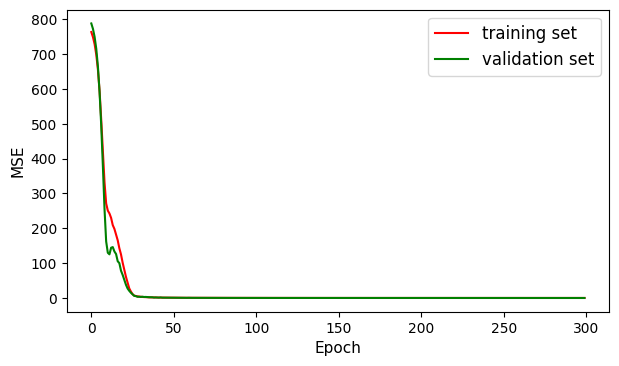

In [8]:
# plt.figure(figsize=(4, 3), dpi=100)
plt.figure(figsize=(7, 4), dpi=100)

plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.text(160, 500, '300 epochs', fontsize=12)
# plt.title('FFNN', fontsize=8)
# plt.savefig("loss_dlbinnedJla_.png")

In [9]:
unet = np.sqrt(np.min(model_train.history['val_loss']))
model_train.history['loss'][-1], model_train.history['val_loss'][-1], model_train.history['val_loss'][-2]

(0.12448150664567947, 0.04636711627244949, 0.045701801776885986)

In [10]:
# ranz = np.linspace(np.min(z), np.max(z), 31)

# # ranz = np.arange(0.0, 1.5, 0.01)
# ranzz = scalerz.transform(ranz.reshape((-1,1)))

# ranzinv = scalerz.transform(ranz.reshape(-1,1))
# ranzz = ranz
# pred_random = neural_model.predict(ranz)

pred_random = neural_model.predict(zz)
# pred_random
# dlfake  = scalerdl.inverse_transform(pred_random[:,0].reshape(-1,1))
dlfake = pred_random[:,0]
errfake = pred_random[:,1]                                     
# dlfake = pred_random[:,0]

In [11]:
np.shape(z), np.shape(dlfake), len(z)

((31,), (31,), 31)

In [12]:
# index = np.argsort(z)
# z = z[index]

# dlfake = dlfake.reshape(31,)[index]

# fake_data = np.stack((z, dlfake[index]), axis=1)
fake_data = np.stack((z, dlfake), axis=1)

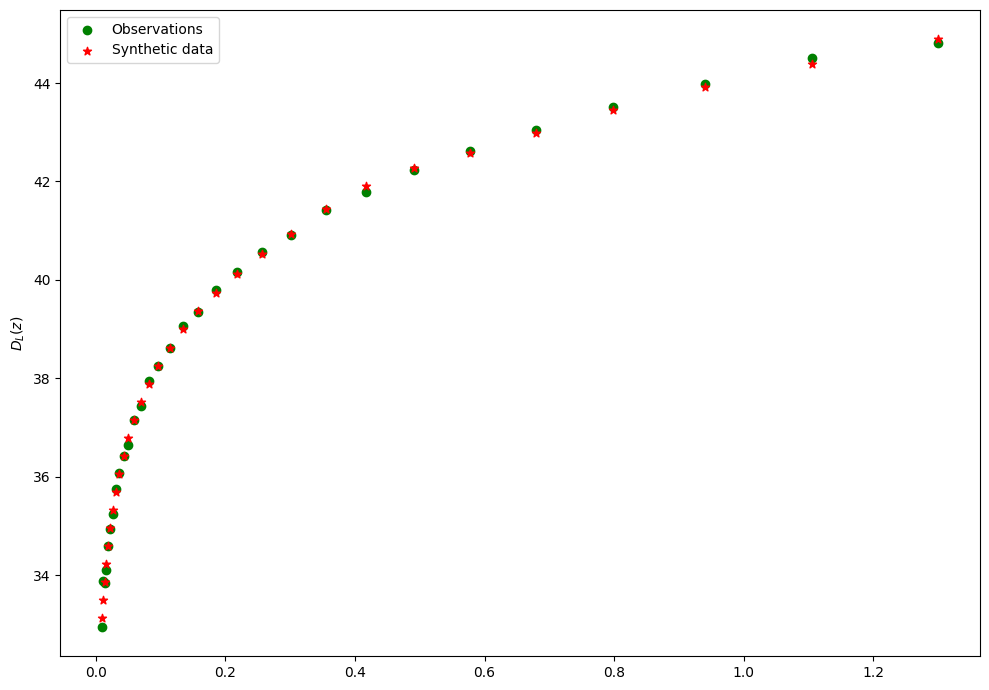

In [13]:
plt.figure(figsize=(10, 7), dpi=100)

plt.scatter(z, dl, c='g', label='Observations')
plt.scatter(z, dlfake, c='r', label='Synthetic data', marker='*')

plt.ylabel("$D_L(z)$")
# plt.xlim(-0.1, np.max(z)+0.2)
plt.tight_layout()
plt.legend()
# plt.savefig('rec_jla_ffnn.png')

In [14]:
np.savetxt("fake_binned_JLA2TEST1.dat",  fake_data, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')

In [15]:
neural_model.save('../models/FFNN_JLA2.h5')

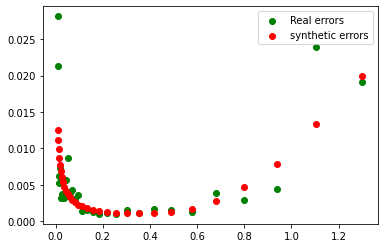

In [16]:
plt.scatter(z, np.exp(errors), c='g', label='Real errors')
plt.scatter(z, np.exp(errfake), c='r', label='synthetic errors')
plt.legend()
# Revisar negativos y usar log. 

In [17]:
z

array([0.01      , 0.01176156, 0.01383342, 0.01627025, 0.01913635,
       0.02250733, 0.02647212, 0.03113533, 0.03661999, 1.3       ,
       0.93975316, 0.67933539, 0.49108275, 0.35499736, 0.25662299,
       0.04307081, 0.05065797, 0.0700773 , 0.09694087, 0.13410237,
       0.18550944, 1.10529594, 0.79900412, 0.57758973, 0.41753213,
       0.30182857, 0.21818796, 0.15772525, 0.11401754, 0.08242181,
       0.05958165])